# Loading complex point data

This notebooks looks at the main `striplog` object. For the basic objects it depends on, see [Basic objects](./Basic_objects.ipynb).

First, import anything we might need.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import striplog
striplog.__version__

'0.7.0'

In [25]:
from striplog import Legend, Lexicon, Interval, Component

In [26]:
legend = Legend.builtin('NSDOE')
lexicon = Lexicon.default()

<hr />
## Making a `striplog`

In [27]:
from striplog import Striplog
imgfile = "data/images/M-MG-70_14.3_135.9.png"

In [28]:
strip = Striplog.from_image(imgfile, 14.3, 135.9, legend=legend)
strip

Striplog(26 Intervals, start=14.3, stop=135.9)

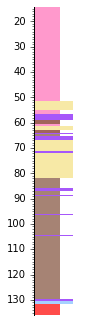

In [29]:
strip.plot(legend, ladder=True, aspect=3)

## A more complicated example

In [17]:
fname = "data/xrf/XRF_sample.csv"

remap = {'rocktype': 'Comp Lithology'}
ignore = ['date', 'project', 'index', 'name', 'sname', 'station']

xrf = Striplog.from_csv(fname, remap=remap, ignore=ignore, null='ND')

In [18]:
xrf[4]

Interval({'components': [Component({'Lithology': 'sandstone'})], 'base': Position({'middle': 60.0, 'units': 'm'}), 'data': {'Cl': 1564.0, 'Y': 31.0, 'S': 789.0, 'Ca': 4854.0, 'K': 10797.0, 'Sm': 18.0, 'Rb': 49.0, 'V': 104.0, 'Ba': 186.0, 'Ti': 6873.0, 'Bi': 5.0, 'La': 113.0, 'Cr': 59.0, 'Cu': 24.0, 'Th': 49.0, 'Sb': 1.0, 'Sr': 47.0, 'P': 2730.0, 'Mo': 1.0, 'As': 11.0, 'Fe': 47737.0, 'Ag': 1.0, 'Ce': 130.0, 'U': 3.0, 'Sn': 19.0, 'Cd': 4.0, 'Co': 19.0, 'Nb': 17.0, 'Zr': 167.0, 'Mn': 678.0, 'Hg': 5.0, 'Zn': 62.0}, 'description': '', 'top': Position({'middle': 50.0, 'units': 'm'})})

## Another more complicated one

In [19]:
fname = 'data/tops/Helen_top.csv'

# What to include: only rows with Well = P-108
include= {'Well identifier': lambda x: x=='P-108'}

# Rename the Surface field as Name.
remap = {'Surface': 'Name'}

# What to exclude: any rows with Name = TD
exclude = {'Name': lambda x: x=='TD'}

# What to transform before using: make Z positive and correct a spelling error.
function = {'Z': lambda x: -x,
            'Name': lambda x: x.replace('Maguma', 'Meguma')}

# Which fields to leave out of the result, apart from those that are Null.
ignore = ['Edited by user', 'Locked to fault', 'Used by dep.conv.', 'Well', 'Symbol']

# Do the thing!
s = Striplog.from_csv(fname,
                      include=include,
                      exclude=exclude,
                      remap=remap,
                      ignore=ignore,
                      function=function,
                      points=False,
                      null=-999.0
                      )

In [20]:
s

Striplog(4 Intervals, start=465.0, stop=1175.0)

## The same thing from Petrel's own format

In [21]:
fname = 'data/tops/Helen_top.txt'

# What to include: only rows with Well = P-108
include= {'Well': lambda x: x=='P-108'}

# Rename the Surface field as Name.
remap = {'Surface': 'Name'}

# What to exclude: any rows with Name = TD
exclude = {'Name': lambda x: x=='TD'}

# What to transform before using: make Z positive and correct a spelling error.
function = {'Z': lambda x: -x,
            'Name': lambda x: x.replace('Maguma', 'Meguma')}

# Which fields to leave out of the result, apart from those that are Null.
ignore = ['Edited by user', 'Locked to fault', 'Used by dep.conv.', 'Well', 'Symbol']

# Do the thing!
s = Striplog.from_petrel(fname,
                         include=include,
                         exclude=exclude,
                         remap=remap,
                         ignore=ignore,
                         function=function,
                         points=False,
                         null=-999.0
                         )

In [22]:
s

Striplog(4 Intervals, start=465.0, stop=1175.0)

In [23]:
s[3]

Interval({'components': [], 'base': Position({'middle': 1175.0, 'units': 'm'}), 'data': {'Used by geo mod': True, 'Name': 'Meguma', 'X': 478677.0, 'Y': 5004321.0, 'Z': 1001.35, 'Interpreter': 'cenx', 'Type': 'Other'}, 'description': '', 'top': Position({'middle': 1055.0, 'units': 'm'})})